In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn import metrics
rng = np.random.RandomState(0)

**Question** Soit $\mathbf W$ une matrice de poids associée à un graphe non dirigé pondéré $G$ de $n$ noeuds et $\mathbf D$ sa matrice diagonale. Soit $\mathbf L = \mathbf D - \mathbf W$. Vérifier que $\mathbf L$ a un vecteur propre égal à $\mathbf 1_n$ (vecteur de $n$ valeurs égales à 1). Quelle est la valeur propre associée ? 

*Réponse* 

Pour la ligne $i$ on a $(\mathbf L\mathbf 1_n)_i = d_i-\sum_{j} \mathbf W_{ij}=0$. Donc $\mathbf L\mathbf 1_n$ est un vecteur de 0 et donc on a bien $\mathbf L\mathbf 1_n = 0*\mathbf 1_n$.

**Question** Charger le jeu de données breast cancer de sklearn. Construire une matrice de poids en utilisant un noyau Gaussien sur les attributs normalisés et vérifier cette propriété. 

In [2]:
from sklearn import datasets, preprocessing
X, y = datasets.load_breast_cancer(return_X_y=True)
scale = preprocessing.StandardScaler()
X = scale.fit_transform(X)

In [3]:
y.shape

(569,)

In [4]:
X.shape

(569, 30)

In [5]:
from sklearn.metrics.pairwise import pairwise_kernels
W1 = pairwise_kernels(X, metric="rbf")
W1 = W1 - np.eye(W1.shape[0])

In [6]:
L1 = np.diag(W1.sum(axis=1)) - W1

In [7]:
np.alltrue(np.isclose(L1@np.ones(L1.shape[0]), np.zeros(L1.shape[0])))

True

**Question** Avec les fonctions que vous avez créées lors du TP précédent, faire un graphe $G_2$ de 12 noeuds avec 3 composantes connexes : deux cercles, et un graphe complet. Afficher la matrice laplacienne et la décomposition spectrale. Quelle est la propriété de cette matrice laplacienne due au fait que le graphe a 3 composantes connexes ? Quelle est la multiplicité de la valeur propre 0 ?  Comparer les résultats avec la décomposition spectrale de la matrice laplacienne du cercle de taille 4.

In [8]:
def cercle(n):
    G = np.eye(n)
    G = np.vstack((G[-1],G[:-1]))
    G = G + G.T
    return G
def complet(n):
    return np.ones((n,n))-np.eye(n)

In [9]:
W2 = np.zeros((12,12))
W2[:4,:4] = cercle(4)
W2[4:8, 4:8] = complet(4)
W2[8:, 8:] = cercle(4)

In [10]:
L2 = np.diag(W2.sum(axis=1)) - W2
L2

array([[ 2., -1.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  0., -1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  3., -1., -1., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  3., -1., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1., -1.,  3., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1., -1., -1.,  3.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2., -1.,  0., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0., -1.,  2.]])

In [11]:
def aff_dec_spec(L):
    E, V = np.linalg.eig(L)
    ind = np.argsort(np.abs(E))
    E_=0
    for i  in ind:
        print(E[i], V[:,i])
        E_+=E[i]
    print(float(E_))

In [12]:
aff_dec_spec(L2)

-1.1102230246251565e-16 [ 0.   0.   0.   0.  -0.5 -0.5 -0.5 -0.5  0.   0.   0.   0. ]
-2.220446049250313e-16 [0.5 0.5 0.5 0.5 0.  0.  0.  0.  0.  0.  0.  0. ]
-2.220446049250313e-16 [0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.5 0.5 0.5]
1.9999999999999996 [ 2.77555756e-17 -7.07106781e-01  2.86262916e-16  7.07106781e-01
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
1.9999999999999996 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.77555756e-17 -7.07106781e-01  2.86262916e-16  7.07106781e-01]
2.0000000000000013 [ 7.07106781e-01 -2.02962647e-16 -7.07106781e-01  1.02348685e-16
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
2.0000000000000013 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.000

In [13]:
aff_dec_spec(np.eye(4)*2- cercle(4))


-2.220446049250313e-16 [0.5 0.5 0.5 0.5]
1.9999999999999996 [ 2.77555756e-17 -7.07106781e-01  2.86262916e-16  7.07106781e-01]
2.0000000000000013 [ 7.07106781e-01 -2.02962647e-16 -7.07106781e-01  1.02348685e-16]
3.9999999999999982 [-0.5  0.5 -0.5  0.5]
7.999999999999999


**Question** Démontrez ce que vous avez observé.

*Réponse*


**Question** Observez quelle est la décomposition spectrale d'un graphe complet sur plusieurs exemples. 

In [14]:
aff_dec_spec(np.eye(10)*9 - complet(10))

(-2.220446049250313e-16+0j) [-0.31622777+0.j -0.31622777+0.j -0.31622777+0.j -0.31622777+0.j
 -0.31622777+0.j -0.31622777+0.j -0.31622777+0.j -0.31622777+0.j
 -0.31622777+0.j -0.31622777+0.j]
(9.999999999999993+0j) [ 0.03232378+0.j -0.01350977+0.j -0.0567965 +0.j -0.00758685+0.j
  0.01498509+0.j  0.00471232+0.j  0.71183142+0.j  0.24158913+0.j
 -0.46377431+0.j -0.46377431+0.j]
(9.999999999999996+0j) [-0.04581988+0.j -0.72521814+0.j  0.6862449 +0.j  0.0121133 +0.j
  0.0121133 +0.j  0.0121133 +0.j  0.0121133 +0.j  0.0121133 +0.j
  0.0121133 +0.j  0.0121133 +0.j]
(10+0j) [ 0.9486833 +0.j -0.10540926+0.j -0.10540926+0.j -0.10540926+0.j
 -0.10540926+0.j -0.10540926+0.j -0.10540926+0.j -0.10540926+0.j
 -0.10540926+0.j -0.10540926+0.j]
(10+0j) [ 0.20701967+0.j  0.89708523+0.j -0.13801311+0.j -0.13801311+0.j
 -0.13801311+0.j -0.13801311+0.j -0.13801311+0.j -0.13801311+0.j
 -0.13801311+0.j -0.13801311+0.j]
(10+0j) [ 0.00216521+0.j  0.17647403+0.j  0.01080408+0.j  0.8297785 +0.j
 -0.35878617+0.j 

/tmp/ipykernel_66222/3015431450.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  print(float(E_))


**Rappel** Si $\mathbf f$ est une fonction qui associe une valeur à chaque noeud, on rappelle que $\mathbf f^\top \mathbf L \mathbf f$ est la valeur de *smoothness* de $\mathbf f$, indiquant comment $\mathbf f$ est lisse sur le graphe. 



**Question** Quelles sont les fonctions qui sont les plus lisses possible sur un graphe. Vérifiez cela sur $G_1$, puis sur $G_2$. En quoi celles de $G_2$ sont différentes de celles de $G_1$ ?

*Réponse* 

- Fonctions constantes 
- Sur des graphes non connexes, constantes sur chaque composante connexe

**Question** Faire la version itérative sur un cercle de 10 noeuds. Les deux premiers noeuds sont étiquetés avec 1 et 0. Cette version itérative calcule la fonction harmonique en effectuant à chaque itération la moyenne des étiquettes des noeuds voisins (sauf pour les noeuds 0 et 1 qui restent fixés).

In [15]:
W = cercle(10)
f = np.zeros(10)
f[0] = 1
f[1] = 0

In [16]:
indices = set(range(10))
indices.remove(0)
indices.remove(1)
indices

{2, 3, 4, 5, 6, 7, 8, 9}

In [17]:
f_new = np.zeros(10)
f_cur = f.copy()
end_loop = False
while not end_loop:
    for i in indices:
        f_cur[i] = (f_new[(i+1)%10] + f_new[(i-1)%10]) / 2
    print(f_new)
    end_loop = np.alltrue(np.isclose(f_new, f_cur))
    f_new = f_cur
    f_cur = f_new.copy()    


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.  0.  0.  0.  0.  0.  0.  0.  0.  0.5]
[1.   0.   0.   0.   0.   0.   0.   0.   0.25 0.5 ]
[1.    0.    0.    0.    0.    0.    0.    0.125 0.25  0.625]
[1.     0.     0.     0.     0.     0.     0.0625 0.125  0.375  0.625 ]
[1.      0.      0.      0.      0.      0.03125 0.0625  0.21875 0.375
 0.6875 ]
[1.       0.       0.       0.       0.015625 0.03125  0.125    0.21875
 0.453125 0.6875  ]
[1.        0.        0.        0.0078125 0.015625  0.0703125 0.125
 0.2890625 0.453125  0.7265625]
[1.         0.         0.00390625 0.0078125  0.0390625  0.0703125
 0.1796875  0.2890625  0.5078125  0.7265625 ]
[1.         0.         0.00390625 0.02148438 0.0390625  0.109375
 0.1796875  0.34375    0.5078125  0.75390625]
[1.         0.         0.01074219 0.02148438 0.06542969 0.109375
 0.2265625  0.34375    0.54882812 0.75390625]
[1.         0.         0.01074219 0.03808594 0.06542969 0.14599609
 0.2265625  0.38769531 0.54882812 0

**Question** Dans le cas général d'un graphe quelconque, de matrice de poids $\mathbf W$, pour un $i$ correspondant à un noeud non étiqueté, $f^{(t+1)}_i$ est la moyenne pondérée des valeurs $f^{(t)}_j$ pour tous les noeuds $j$ voisins de $i$.  

- Écrire la formule générale d'une itération de ce calcul, quel que soit le graphe. 


*Réponse*

 Soit pour un noeud $i$ non étiqueté

$$ f^{(t+1)}_i = \frac{1}{d_{i}}\sum_{j}^{n} \mathbf W_{ij} f^{(t)}_j$$


**Question** Reformuler cela mais avec la matrice stochastique $\mathbf P$ associée à $\mathbf W$

*Réponse* 

$$ f^{(t+1)}_i = \sum_{j}^{n} \mathbf P_{ij} f^{(t)}_j$$


**Question** Toujours sur ce cercle de 10 noeuds dont les deux premiers noeuds sont étiquetés avec 1 et 0, faire maintenant l'algorithme de Zhu et al 2003 en calculant la solution harmonique par la formule analytique donnée en cours.

In [18]:
W

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

In [19]:
Wul = W[2:, :2]
Wul

array([[0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.]])

In [20]:
Wuu = W[2:, 2:]
Wuu

array([[0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0.]])

In [21]:
fl = f[:2]
fl

array([1., 0.])

In [22]:
D = np.diag(W.sum(axis=1))

In [23]:
L = D - W
Luu = L[2:,2:]

In [24]:
fu = (np.linalg.inv(Luu))@Wul@fl

In [25]:
fu

array([0.11111111, 0.22222222, 0.33333333, 0.44444444, 0.55555556,
       0.66666667, 0.77777778, 0.88888889])

**Question** Refaire la même chose mais en reprenant la matrice stochastique $\mathbf P$ associée à $\mathbf W$. Vérifiez que vous obtenez bien le même résultat.

In [26]:
P = W/W.sum(axis=1)
Pul = P[2:, :2]
Puu = P[2:, 2:]
PL = np.eye(10) - P
PLuu = PL[2:, 2:]
pfu = (np.linalg.inv(PLuu))@Pul@fl

In [27]:
pfu

array([0.11111111, 0.22222222, 0.33333333, 0.44444444, 0.55555556,
       0.66666667, 0.77777778, 0.88888889])

**Question** Sur ce petit graphe, on applique maintenant la méthode de Zhou et al 2003. Construire la matrice $\mathbf S$

In [28]:
d = np.sum(W, axis=1)
D12 = np.diag(d**(-1/2))
S = D12@W@D12
S

array([[0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5],
       [0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5],
       [0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. ]])

**Question** Prendre une valeur de $\alpha=.99$. Faire la version itérative.

In [29]:
alpha = .99
f_cur = rng.random(10)
end_loop = False
while not end_loop:
    print(f_cur)
    f_new = alpha*S@f_cur + (1-alpha)*f
    end_loop = np.alltrue(np.allclose(f_new, f_cur))
    f_cur = f_new


[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
 0.43758721 0.891773   0.96366276 0.38344152]
[0.55382229 0.57003056 0.62373591 0.508077   0.58943476 0.4263148
 0.76114522 0.69361874 0.63123119 0.74867575]
[0.66275962 0.58289131 0.53366324 0.60051948 0.46252394 0.66853709
 0.5543671  0.68922632 0.71393577 0.58660147]
[0.58889893 0.59222932 0.58578834 0.49311265 0.628183   0.50336106
 0.67209289 0.62780992 0.63153476 0.68146422]
[0.6404783  0.5814702  0.53724427 0.60091582 0.49325449 0.64363657
 0.55992964 0.64529569 0.6480907  0.60411467]
[0.59686451 0.58297267 0.58528108 0.51009689 0.61605343 0.52132614
 0.63802147 0.59797007 0.61845813 0.63784165]
[0.61430309 0.58516207 0.54106943 0.59466058 0.5105544  0.62076707
 0.55405162 0.6219574  0.6117268  0.60158471]
[0.59743965 0.5719094  0.58401221 0.5205538  0.60163669 0.52697998
 0.61514861 0.57706032 0.60565334 0.6068848 ]
[0.59350313 0.58481867 0.54076928 0.58689621 0.51852922 0.60230872
 0.54649995 0.60429697 0.58605

**Question** Calculer maintenant le résultat avec la formule analytique.

In [30]:
np.linalg.inv(np.eye(10)- alpha*S)@f

array([11.60726288, 10.71440694, 10.03800368,  9.56438837,  9.28399302,
        9.19115309,  9.28399302,  9.56438837, 10.03800368, 10.71440694])

**Question** Sur plusieurs jeux de données considérer une portion variable de données étiquetées et apprendre les étiquettes avec la méthode des fonctions harmoniques de Zhu et 2003,  et la méthode de Global-Local consistency de Zhou et al 2003. 

- Prendre les données de breast cancer 
- Prendre le problème des deux lunes, avec un noyau Gaussien, avec un knn graphe
- Prendre le jeu de données digits, avec noyau Gaussien, avec un knn graphe, considérer plusieurs problèmes binaires de votre choix à partir de ces données 
- Trouver un jeu de données public et essayer ces méthodes de classification

On prendra une règle de classification adaptée car les deux méthodes sont une relaxation réelle de ce problème discret. 

On fera une analyse en fonction de la taille des données étiquetées.

In [31]:
L1.shape

(569, 569)

In [32]:
y.shape

(569,)

In [33]:
def eval(W,L,portion,y):
    Wul = W[portion:, :portion]
    fl = y[:portion]
    Luu = L[portion:,portion:]
    fu = (np.linalg.inv(Luu))@Wul@fl
    print(metrics.classification_report( y[portion:],np.round(fu),zero_division=True))
    return np.round(fu)

In [34]:
portions = [50,100,200]
for p in portions:
    print(10*'-'+'Evaluation withc',p,'labeled nodes'+'-'*10)
    eval(W1,L1,p,y)

----------Evaluation withc 50 labeled nodes----------
              precision    recall  f1-score   support

           0       0.33      1.00      0.49       169
           1       1.00      0.00      0.00       350

    accuracy                           0.33       519
   macro avg       0.66      0.50      0.25       519
weighted avg       0.78      0.33      0.16       519

----------Evaluation withc 100 labeled nodes----------
              precision    recall  f1-score   support

           0       0.60      0.99      0.75       147
           1       1.00      0.70      0.82       322

    accuracy                           0.79       469
   macro avg       0.80      0.84      0.78       469
weighted avg       0.87      0.79      0.80       469

----------Evaluation withc 200 labeled nodes----------
              precision    recall  f1-score   support

           0       1.00      0.79      0.88       108
           1       0.92      1.00      0.96       261

    accuracy      

In [35]:
def rbf(X):
    W = pairwise_kernels(X, metric="rbf")
    W = W - np.eye(W.shape[0])
    L = np.diag(W.sum(axis=1)) - W
    return W,L

## Two moons dataset

In [36]:
from sklearn import datasets, preprocessing
n_samples= 1500
X_moons, y_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
X_moons.shape

(1500, 2)

In [37]:
X_moons = scale.fit_transform(X_moons)

### Visualisation

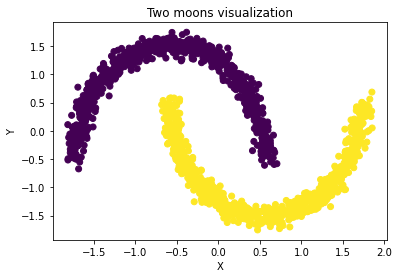

In [38]:
plt.scatter(X_moons[:,0],X_moons[:,1],c=y_moons)
plt.title('Two moons visualization')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Evaluation

#### Avec noyau Gaussien

In [39]:

W_moons ,L_moons = rbf(X_moons)

In [40]:
W_moons.shape

(1500, 1500)

In [41]:
portions = [50,100,200,300,500]
preds = {}
for i,p in enumerate(portions):
    print(10*'-'+'Evaluation withc',p,'labeled nodes'+'-'*10)
    preds[p] = eval(W_moons,L_moons,p,y_moons)

----------Evaluation withc 50 labeled nodes----------
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       725
           1       1.00      0.70      0.82       725

    accuracy                           0.85      1450
   macro avg       0.88      0.85      0.84      1450
weighted avg       0.88      0.85      0.84      1450

----------Evaluation withc 100 labeled nodes----------
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       701
           1       0.87      0.86      0.86       699

    accuracy                           0.87      1400
   macro avg       0.87      0.87      0.87      1400
weighted avg       0.87      0.87      0.87      1400

----------Evaluation withc 200 labeled nodes----------
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       651
           1       0.87      0.88      0.88       649

    accuracy      

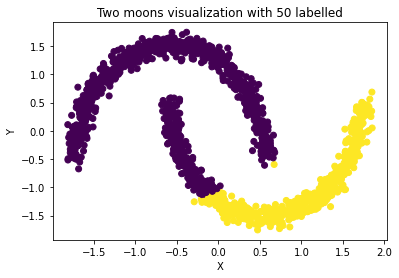

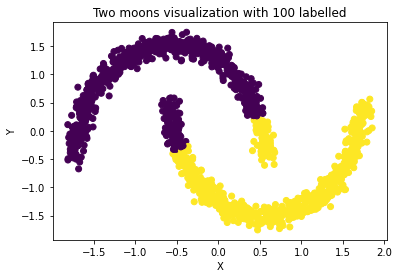

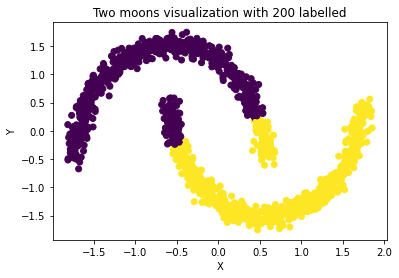

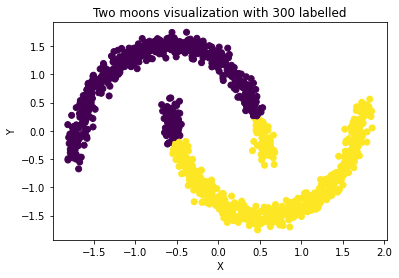

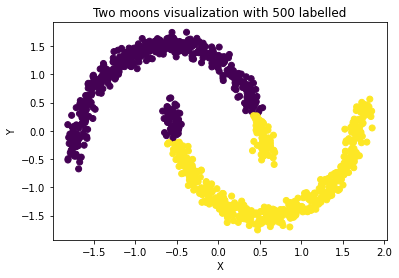

In [42]:

for i,j in preds.items():
    plt.scatter(X_moons[:,0][i:],X_moons[:,1][i:],c=j)
    plt.title('Two moons visualization with '+str(i)+' labelled')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

#### Avec Knn graph

In [43]:
from sklearn.neighbors import kneighbors_graph 

def knn(X):
    connectivity = kneighbors_graph(
        X, 10, include_self=False
    )
    W = connectivity.toarray()
    L = np.diag(W.sum(axis=1)) - W
    return W,L
    

In [44]:
W_moons_knn, L_moons_knn = knn(X_moons)

In [45]:
portions_knn = [0,1,50]
preds_knn = {}
for i,p in enumerate(portions_knn):
    print(10*'-'+'Evaluation withc',p,'labeled nodes'+'-'*10)
    preds_knn[p] = eval(W_moons_knn,L_moons_knn,p,y_moons)

----------Evaluation withc 0 labeled nodes----------
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       750
           1       1.00      0.00      0.00       750

    accuracy                           0.50      1500
   macro avg       0.75      0.50      0.33      1500
weighted avg       0.75      0.50      0.33      1500

----------Evaluation withc 1 labeled nodes----------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       750
           1       1.00      1.00      1.00       749

    accuracy                           1.00      1499
   macro avg       1.00      1.00      1.00      1499
weighted avg       1.00      1.00      1.00      1499

----------Evaluation withc 50 labeled nodes----------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       725
           1       1.00      1.00      1.00       725

    accuracy          

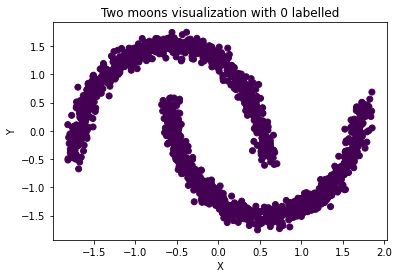

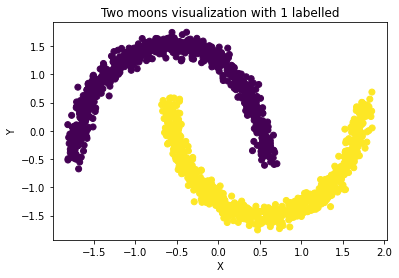

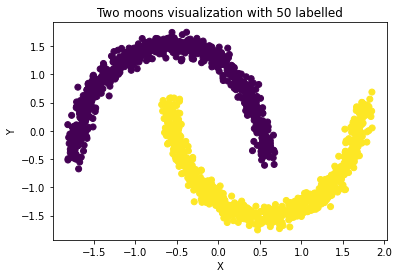

In [46]:

for i,j in preds_knn.items():
    plt.scatter(X_moons[:,0][i:],X_moons[:,1][i:],c=j)
    plt.title('Two moons visualization with '+str(i)+' labelled')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

## Digits dataset

<Figure size 432x288 with 0 Axes>

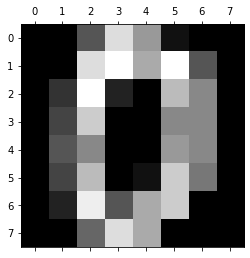

In [47]:
from sklearn.datasets import load_digits

digits = load_digits()
plt.gray()
plt.matshow(digits.images[0])
plt.show()

In [48]:
y.shape

(569,)

In [49]:
digits.target[0]

0

In [50]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [51]:
digits.data.shape

(1797, 64)

### Noyau Gaussien

In [52]:
X_digits = digits.data


In [53]:
W_digits ,L_digits = rbf(X_digits)

In [54]:
W_digits.shape

(1797, 1797)

On decide de faire une classification binaire pair/impair sur ce dataset 

In [55]:
y_digits = digits.target
y_digits = np.array([1 if (i%2!=0) else 0  for i in y_digits ])
y_digits

array([0, 1, 0, ..., 0, 1, 0])

In [56]:
W_digits, L_digits = rbf(X_digits)

In [57]:
portions = [10,20,50,100,200]
preds = {}
for i,p in enumerate(portions):
    print(10*'-'+'Evaluation withc',p,'labeled nodes'+'-'*10)
    preds[p] = eval(W_digits, L_digits,p,y_digits)

----------Evaluation withc 10 labeled nodes----------
              precision    recall  f1-score   support

           0       0.95      0.61      0.74       886
           1       0.72      0.97      0.82       901

    accuracy                           0.79      1787
   macro avg       0.83      0.79      0.78      1787
weighted avg       0.83      0.79      0.78      1787

----------Evaluation withc 20 labeled nodes----------
              precision    recall  f1-score   support

           0       0.96      0.80      0.87       881
           1       0.83      0.97      0.89       896

    accuracy                           0.88      1777
   macro avg       0.90      0.88      0.88      1777
weighted avg       0.90      0.88      0.88      1777

----------Evaluation withc 50 labeled nodes----------
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       868
           1       0.91      0.97      0.94       879

    accuracy        

### Avec KNN graph

In [58]:
W_digits_knn, L_digits_knn = knn(X_digits)

In [59]:
portions_knn = [0,10,20,40,50]
preds_knn = {}
for i,p in enumerate(portions_knn):
    print(10*'-'+'Evaluation withc',p,'labeled nodes'+'-'*10)
    preds_knn[p] = eval(W_digits_knn, L_digits_knn,p,y_digits)

----------Evaluation withc 0 labeled nodes----------
              precision    recall  f1-score   support

           0       0.50      1.00      0.66       891
           1       1.00      0.00      0.00       906

    accuracy                           0.50      1797
   macro avg       0.75      0.50      0.33      1797
weighted avg       0.75      0.50      0.33      1797

----------Evaluation withc 10 labeled nodes----------
              precision    recall  f1-score   support

           0       0.96      0.80      0.87       886
           1       0.83      0.97      0.89       901

    accuracy                           0.88      1787
   macro avg       0.89      0.88      0.88      1787
weighted avg       0.89      0.88      0.88      1787

----------Evaluation withc 20 labeled nodes----------
              precision    recall  f1-score   support

           0       0.96      0.80      0.88       881
           1       0.83      0.97      0.90       896

    accuracy         

### Methode Local Global

In [60]:

def s_matrix(W):
    d = np.sum(W, axis=1)
    D12 = np.diag(d**(-1/2))
    S = D12@W@D12
    return S

In [61]:
def analytica(S,p,y,class_cond):
    f = np.zeros(S.shape[0])
    f[:p]= y[:p]
    res = np.linalg.inv(np.eye(S.shape[0])- alpha*S)@f
    res = [0 if i < class_cond else 1 for i in res]
    print(metrics.classification_report( y,res,zero_division=True))
    return res

### Cancer Dataset

In [62]:
S_cancer = s_matrix(W1)

In [63]:
portions = [10,20,50]
preds = {}
for i,p in enumerate(portions):
    print(10*'-'+'Evaluation withc',p,'labeled nodes'+'-'*10)
    preds[p] = analytica(S_cancer,p,y,1.3)

----------Evaluation withc 10 labeled nodes----------
              precision    recall  f1-score   support

           0       0.37      1.00      0.54       212
           1       1.00      0.00      0.00       357

    accuracy                           0.37       569
   macro avg       0.69      0.50      0.27       569
weighted avg       0.77      0.37      0.20       569

----------Evaluation withc 20 labeled nodes----------
              precision    recall  f1-score   support

           0       0.37      1.00      0.54       212
           1       1.00      0.00      0.00       357

    accuracy                           0.37       569
   macro avg       0.69      0.50      0.27       569
weighted avg       0.77      0.37      0.20       569

----------Evaluation withc 50 labeled nodes----------
              precision    recall  f1-score   support

           0       0.73      0.68      0.70       212
           1       0.82      0.85      0.83       357

    accuracy        

### Monns Dataset

In [64]:
S_moons = s_matrix(W_moons)
S_moons_knn = s_matrix(W_moons_knn)

In [65]:
portions = [10,20,50,70]
preds = {}
preds_knn = {}
for i,p in enumerate(portions):
    print(20*'-'+'Evaluation with',p,'labeled nodes'+'-'*20)
    print(30*'-'+'Gaussian'+'-'*30)
    preds[p] = analytica(S_moons,p,y_moons,2)
    print(30*'-'+'Knn'+'-'*30)
    preds_knn[p] = analytica(S_moons_knn,p,y_moons,2)
    print(60*'=')

--------------------Evaluation with 10 labeled nodes--------------------
------------------------------Gaussian------------------------------
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       750
           1       1.00      0.00      0.00       750

    accuracy                           0.50      1500
   macro avg       0.75      0.50      0.33      1500
weighted avg       0.75      0.50      0.33      1500

------------------------------Knn------------------------------
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       750
           1       1.00      0.00      0.01       750

    accuracy                           0.50      1500
   macro avg       0.75      0.50      0.34      1500
weighted avg       0.75      0.50      0.34      1500

--------------------Evaluation with 20 labeled nodes--------------------
------------------------------Gaussian-----------------------------

### Digits dataset

In [66]:
S_digits = s_matrix(W_digits)
S_digits_knn = s_matrix(W_digits_knn)

In [67]:
portions = [10,20,50]
preds = {}
for i,p in enumerate(portions):
    print(20*'-'+'Evaluation with',p,'labeled nodes'+'-'*20)
    print(30*'-'+'Gaussian'+'-'*30)
    preds[p] = analytica(S_digits,p,y_digits,0.1)
    print(30*'-'+'Knn'+'-'*30)
    preds_knn[p] = analytica(S_digits_knn,p,y_digits,0.5)
    print(60*'=')

--------------------Evaluation with 10 labeled nodes--------------------
------------------------------Gaussian------------------------------
              precision    recall  f1-score   support

           0       0.66      0.99      0.79       891
           1       0.99      0.49      0.65       906

    accuracy                           0.74      1797
   macro avg       0.82      0.74      0.72      1797
weighted avg       0.82      0.74      0.72      1797

------------------------------Knn------------------------------
              precision    recall  f1-score   support

           0       0.53      1.00      0.69       891
           1       1.00      0.12      0.21       906

    accuracy                           0.56      1797
   macro avg       0.76      0.56      0.45      1797
weighted avg       0.77      0.56      0.45      1797

--------------------Evaluation with 20 labeled nodes--------------------
------------------------------Gaussian-----------------------------

## Real dataset

In [68]:
import pandas as pd

***Data Set Information:***

This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere. 

In [69]:
data = pd.read_csv('ionosphere.data')

In [70]:
data.shape

(350, 35)

In [71]:
X_real = data.iloc[:,:-1]
y_real = data.iloc[:,-1]
y_real = pd.factorize(y_real)[0] #To transform y values to a categorial type

In [72]:
y_real.shape,X_real.shape

((350,), (350, 34))

In [73]:
X_real = X_real.to_numpy()

In [74]:
X_real = scale.fit_transform(X_real)

In [75]:
W_real, L_real = rbf(X_real)
W_real_knn, L_real_knn = knn(X_real)

In [76]:
W_real.shape

(350, 350)

### Methode 1

In [77]:
portions = [10,20,50,100,200]
preds = {}
preds_knn = {}

for i,p in enumerate(portions):
    print(20*'-'+'Evaluation with',p,'labeled nodes'+'-'*20)
    print(30*'-'+'Gaussian'+'-'*30)
    preds[p] = eval(W_real,L_real,p,y_real)
    print(30*'-'+'Knn'+'-'*30)
    preds_knn[p] = eval(W_real_knn,L_real_knn,p,y_real)
    print(60*'=')

--------------------Evaluation with 10 labeled nodes--------------------
------------------------------Gaussian------------------------------
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       121
           1       0.64      1.00      0.78       219

    accuracy                           0.64       340
   macro avg       0.82      0.50      0.39       340
weighted avg       0.77      0.64      0.50       340

------------------------------Knn------------------------------
              precision    recall  f1-score   support

           0       0.87      0.59      0.70       121
           1       0.81      0.95      0.87       219

    accuracy                           0.82       340
   macro avg       0.84      0.77      0.79       340
weighted avg       0.83      0.82      0.81       340

--------------------Evaluation with 20 labeled nodes--------------------
------------------------------Gaussian-----------------------------

### Methode 2

In [78]:
S_gaussian = s_matrix(W_real)
S_knn = s_matrix(W_real_knn)

In [79]:
portions = [100]
preds = {}
preds_knn = {}

for i,p in enumerate(portions):
    print(20*'-'+'Evaluation with',p,'labeled nodes'+'-'*20)
    print(30*'-'+'Gaussian'+'-'*30)
    preds[p] = analytica(S_gaussian,p,y_real,10)
    print(30*'-'+'Knn'+'-'*30)
    preds_knn[p] = analytica(S_knn,p,y_real,0.8)
    print(60*'=')

--------------------Evaluation with 100 labeled nodes--------------------
------------------------------Gaussian------------------------------
              precision    recall  f1-score   support

           0       0.92      0.48      0.63       126
           1       0.77      0.98      0.86       224

    accuracy                           0.80       350
   macro avg       0.85      0.73      0.74       350
weighted avg       0.82      0.80      0.78       350

------------------------------Knn------------------------------
              precision    recall  f1-score   support

           0       0.57      0.50      0.53       126
           1       0.74      0.79      0.76       224

    accuracy                           0.69       350
   macro avg       0.66      0.65      0.65       350
weighted avg       0.68      0.69      0.68       350

